<a href="https://colab.research.google.com/github/TiruveedulaAjay/EV-Market-Analysis/blob/main/MARKET_SEGMENTATION_ANALYSIS_OF_ELECTRIC_VEHICLES_MARKET_IN_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load the dataset
file_path = "/vahan.parivahan.gov.in.evdb_statewise_2020_2024.csv"
ev_data = pd.read_csv(file_path)
file_path_ev_makers = "/EV Maker by Place.csv"
ev_makers_data = pd.read_csv(file_path_ev_makers)

In [ ]:
# Selecting relevant columns for clustering
ev_data_filtered = ev_data[['State', 'PURE EV', 'PLUG-IN HYBRID EV', 'Total']]
print(ev_data_filtered)

             State  PURE EV  PLUG-IN HYBRID EV  Total
0      Lakshadweep      0.0                0.0      1
1      Lakshadweep      0.0                0.0     20
2      Lakshadweep      0.0                0.0      1
3      Lakshadweep      0.0                0.0      2
4      Lakshadweep      0.0                0.0     11
...            ...      ...                ...    ...
48674          Goa    339.0                0.0   3760
48675          Goa      0.0                0.0      1
48676          Goa      0.0                0.0      3
48677          Goa      1.0                0.0    237
48678          Goa     50.0                0.0   1734

[48679 rows x 4 columns]


In [ ]:
# Aggregate data by State
statewise_ev_data = ev_data_filtered.groupby('State').sum().reset_index()
print(statewise_ev_data)

                       State  PURE EV  PLUG-IN HYBRID EV     Total
0   Andaman & Nicobar Island     18.0                0.0     35622
1             Andhra Pradesh  14606.0                1.0   4439485
2          Arunachal Pradesh     10.0                0.0    138103
3                      Assam   5802.0                0.0   2666224
4                      Bihar  15311.0                0.0   5853460
5                 Chandigarh    927.0                0.0    216100
6               Chhattisgarh  15268.0                0.0   2694151
7                 DNH and DD     75.0                0.0     95445
8                      Delhi  12401.0                1.0   2848355
9                        Goa   2458.0                0.0    329313
10                   Gujarat  25752.0                2.0   7667152
11                   Haryana  11695.0                4.0   3819151
12          Himachal Pradesh    399.0                1.0    641729
13         Jammu and Kashmir   1563.0                0.0    85

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(statewise_ev_data.describe())

Descriptive Statistics:
            PURE EV  PLUG-IN HYBRID EV         Total    Cluster
count     35.000000          35.000000  3.500000e+01  35.000000
mean   13969.428571           0.914286  3.107585e+06   0.685714
std    20279.806633           2.214543  3.734408e+06   0.932152
min        0.000000           0.000000  7.990000e+02   0.000000
25%       61.500000           0.000000  1.644750e+05   0.000000
50%     5041.000000           0.000000  2.564058e+06   0.000000
75%    16898.500000           1.000000  4.806328e+06   2.000000
max    86651.000000          12.000000  1.553134e+07   2.000000


In [ ]:
# State-wise Analysis
print("State-wise EV Analysis:")
for state in statewise_ev_data['State'].unique():
    state_data = statewise_ev_data[statewise_ev_data['State'] == state]
    print(f"\nState: {state}")
    print(state_data[['PURE EV', 'PLUG-IN HYBRID EV', 'Total']])

State-wise EV Analysis:

State: Andaman & Nicobar Island
   PURE EV  PLUG-IN HYBRID EV  Total
0     18.0                0.0  35622

State: Tripura
    PURE EV  PLUG-IN HYBRID EV   Total
31    366.0                0.0  269845

State: Sikkim
    PURE EV  PLUG-IN HYBRID EV  Total
29      0.0                0.0  50650

State: Punjab
    PURE EV  PLUG-IN HYBRID EV    Total
27  12251.0                0.0  2932658

State: Puducherry
    PURE EV  PLUG-IN HYBRID EV   Total
26   1321.0                3.0  258748

State: Nagaland
    PURE EV  PLUG-IN HYBRID EV   Total
24      4.0                0.0  121594

State: Mizoram
    PURE EV  PLUG-IN HYBRID EV   Total
23     48.0                0.0  134809

State: Meghalaya
    PURE EV  PLUG-IN HYBRID EV   Total
22     18.0                0.0  167759

State: Manipur
    PURE EV  PLUG-IN HYBRID EV   Total
21     16.0                0.0  161191

State: Lakshadweep
    PURE EV  PLUG-IN HYBRID EV  Total
18      0.0                0.0    799

State: Uttarakha

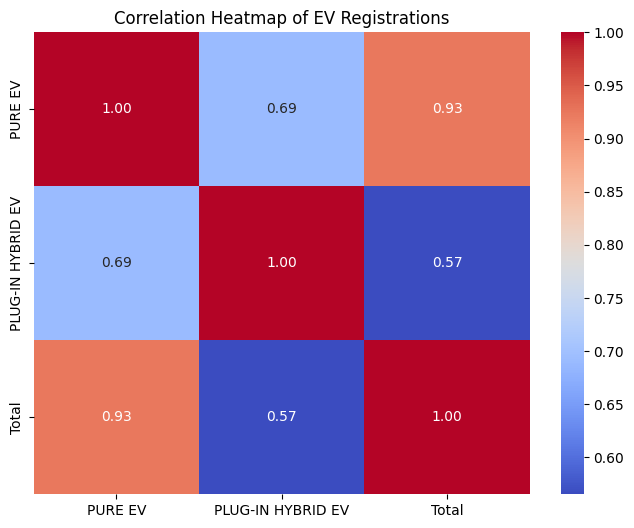

In [ ]:
# Correlation Analysis
correlation_matrix = statewise_ev_data[['PURE EV', 'PLUG-IN HYBRID EV', 'Total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of EV Registrations")
plt.show()

In [ ]:
# Normalize data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(statewise_ev_data[['PURE EV', 'PLUG-IN HYBRID EV', 'Total']])
print(scaled_features)

[[-0.69799037 -0.41888262 -0.83461998]
 [ 0.03184769  0.03927025  0.36186313]
 [-0.69839062 -0.41888262 -0.80677697]
 [-0.40861669 -0.41888262 -0.11991317]
 [ 0.06711886 -0.41888262  0.74602522]
 [-0.65251308 -0.41888262 -0.78558601]
 [ 0.06496757 -0.41888262 -0.1123257 ]
 [-0.69513866 -0.41888262 -0.8183667 ]
 [-0.07846853  0.03927025 -0.0704301 ]
 [-0.5759171  -0.41888262 -0.75482723]
 [ 0.58948239  0.49742311  1.2387862 ]
 [-0.11378973  1.41372883  0.19332493]
 [-0.67892893  0.03927025 -0.6699471 ]
 [-0.62069398 -0.41888262 -0.61259319]
 [-0.44668954 -0.41888262 -0.1476706 ]
 [ 1.8065629  -0.41888262  1.19717506]
 [ 0.42248215  0.03927025  0.15188332]
 [-0.69889092 -0.41888262 -0.83816172]
 [-0.69889092 -0.41888262 -0.84408102]
 [ 1.09873805 -0.41888262  1.02478077]
 [ 3.63626112  5.07895171  2.28460746]
 [-0.69809043 -0.41888262 -0.80050421]
 [-0.69799037 -0.41888262 -0.79871975]
 [-0.69648947 -0.41888262 -0.80767192]
 [-0.6986908  -0.41888262 -0.8112623 ]
 [ 0.2259642  -0.41888262

In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
statewise_ev_data['Cluster'] = kmeans.fit_predict(scaled_features)
print(statewise_ev_data['Cluster'])

0     0
1     2
2     0
3     0
4     2
5     0
6     0
7     0
8     0
9     0
10    2
11    2
12    0
13    0
14    0
15    2
16    2
17    0
18    0
19    2
20    1
21    0
22    0
23    0
24    0
25    2
26    0
27    0
28    2
29    0
30    2
31    0
32    1
33    0
34    2
Name: Cluster, dtype: int32


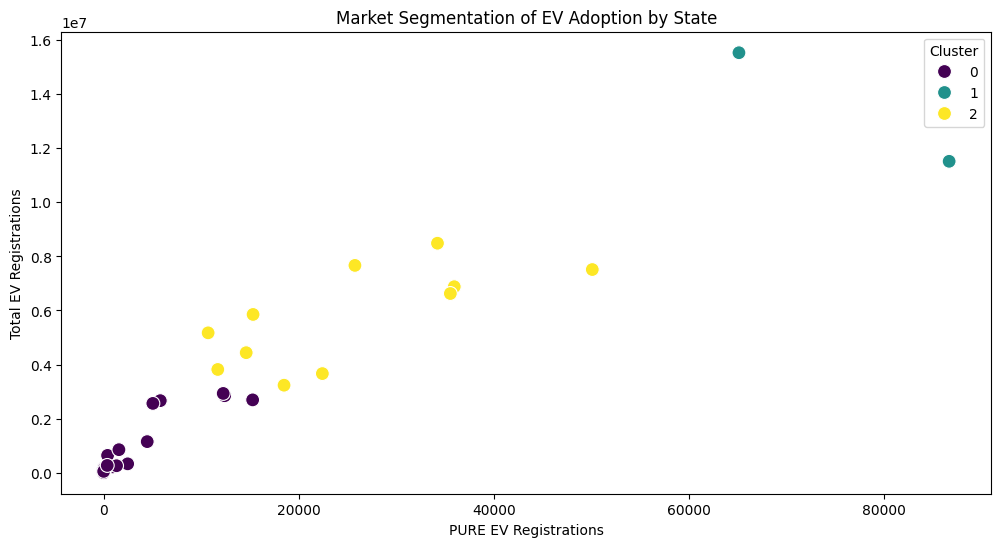

In [ ]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=statewise_ev_data['PURE EV'], y=statewise_ev_data['Total'],
                hue=statewise_ev_data['Cluster'], palette='viridis', s=100)
plt.xlabel("PURE EV Registrations")
plt.ylabel("Total EV Registrations")
plt.title("Market Segmentation of EV Adoption by State")
plt.legend(title="Cluster")
plt.show()

<ipython-input-16-f9a505042cf9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Total', data=statewise_ev_data, palette='Blues')


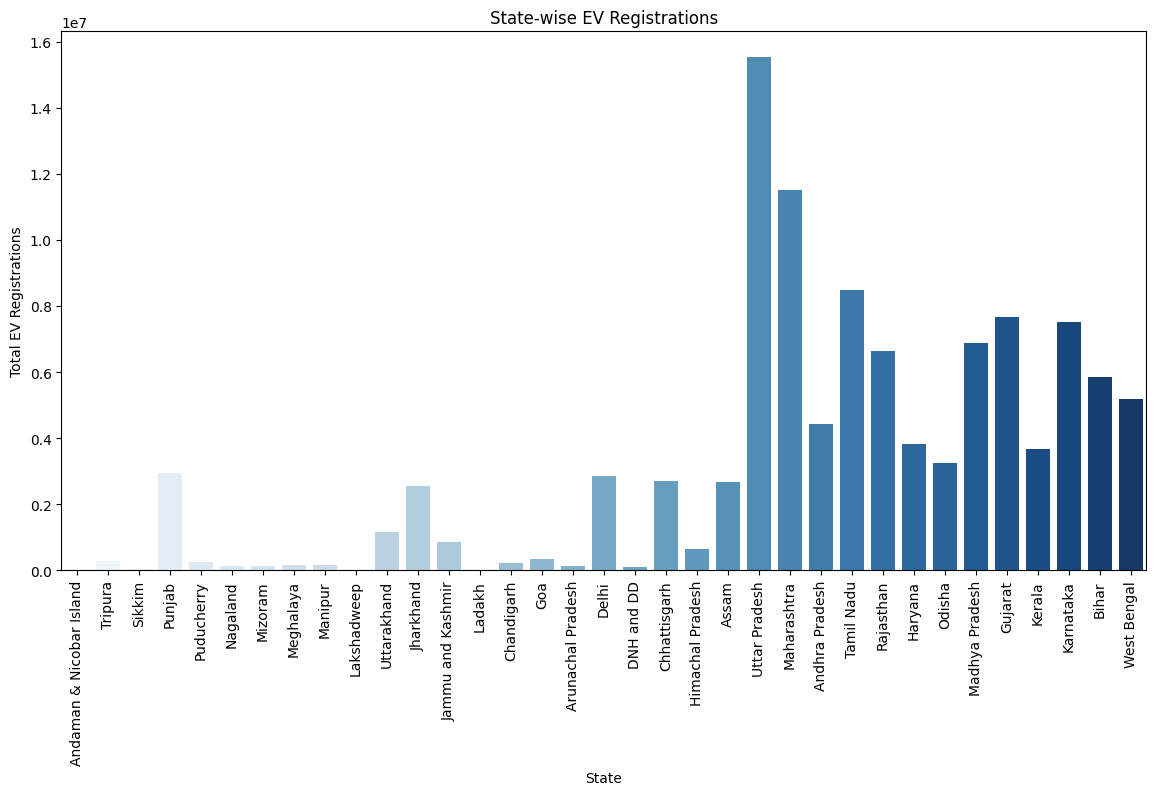

In [ ]:
# State-wise Bar Chart
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Total', data=statewise_ev_data, palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total EV Registrations")
plt.title("State-wise EV Registrations")
plt.show()

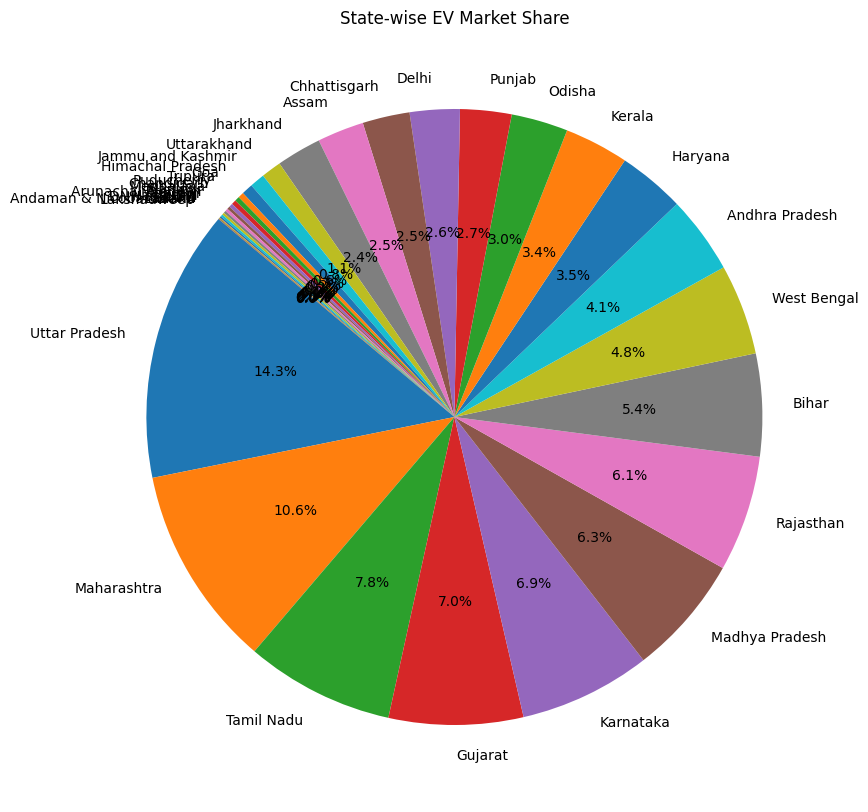

In [ ]:
# State-wise Pie Chart
plt.figure(figsize=(10, 10))
statewise_ev_data_sorted = statewise_ev_data.sort_values(by='Total', ascending=False)
plt.pie(statewise_ev_data_sorted['Total'], labels=statewise_ev_data_sorted['State'], autopct='%1.1f%%', startangle=140)
plt.title("State-wise EV Market Share")
plt.show()

<ipython-input-21-4f5c5bbe1c6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ev_data['Vehicle Class'], order=ev_data['Vehicle Class'].value_counts().index, palette='coolwarm')


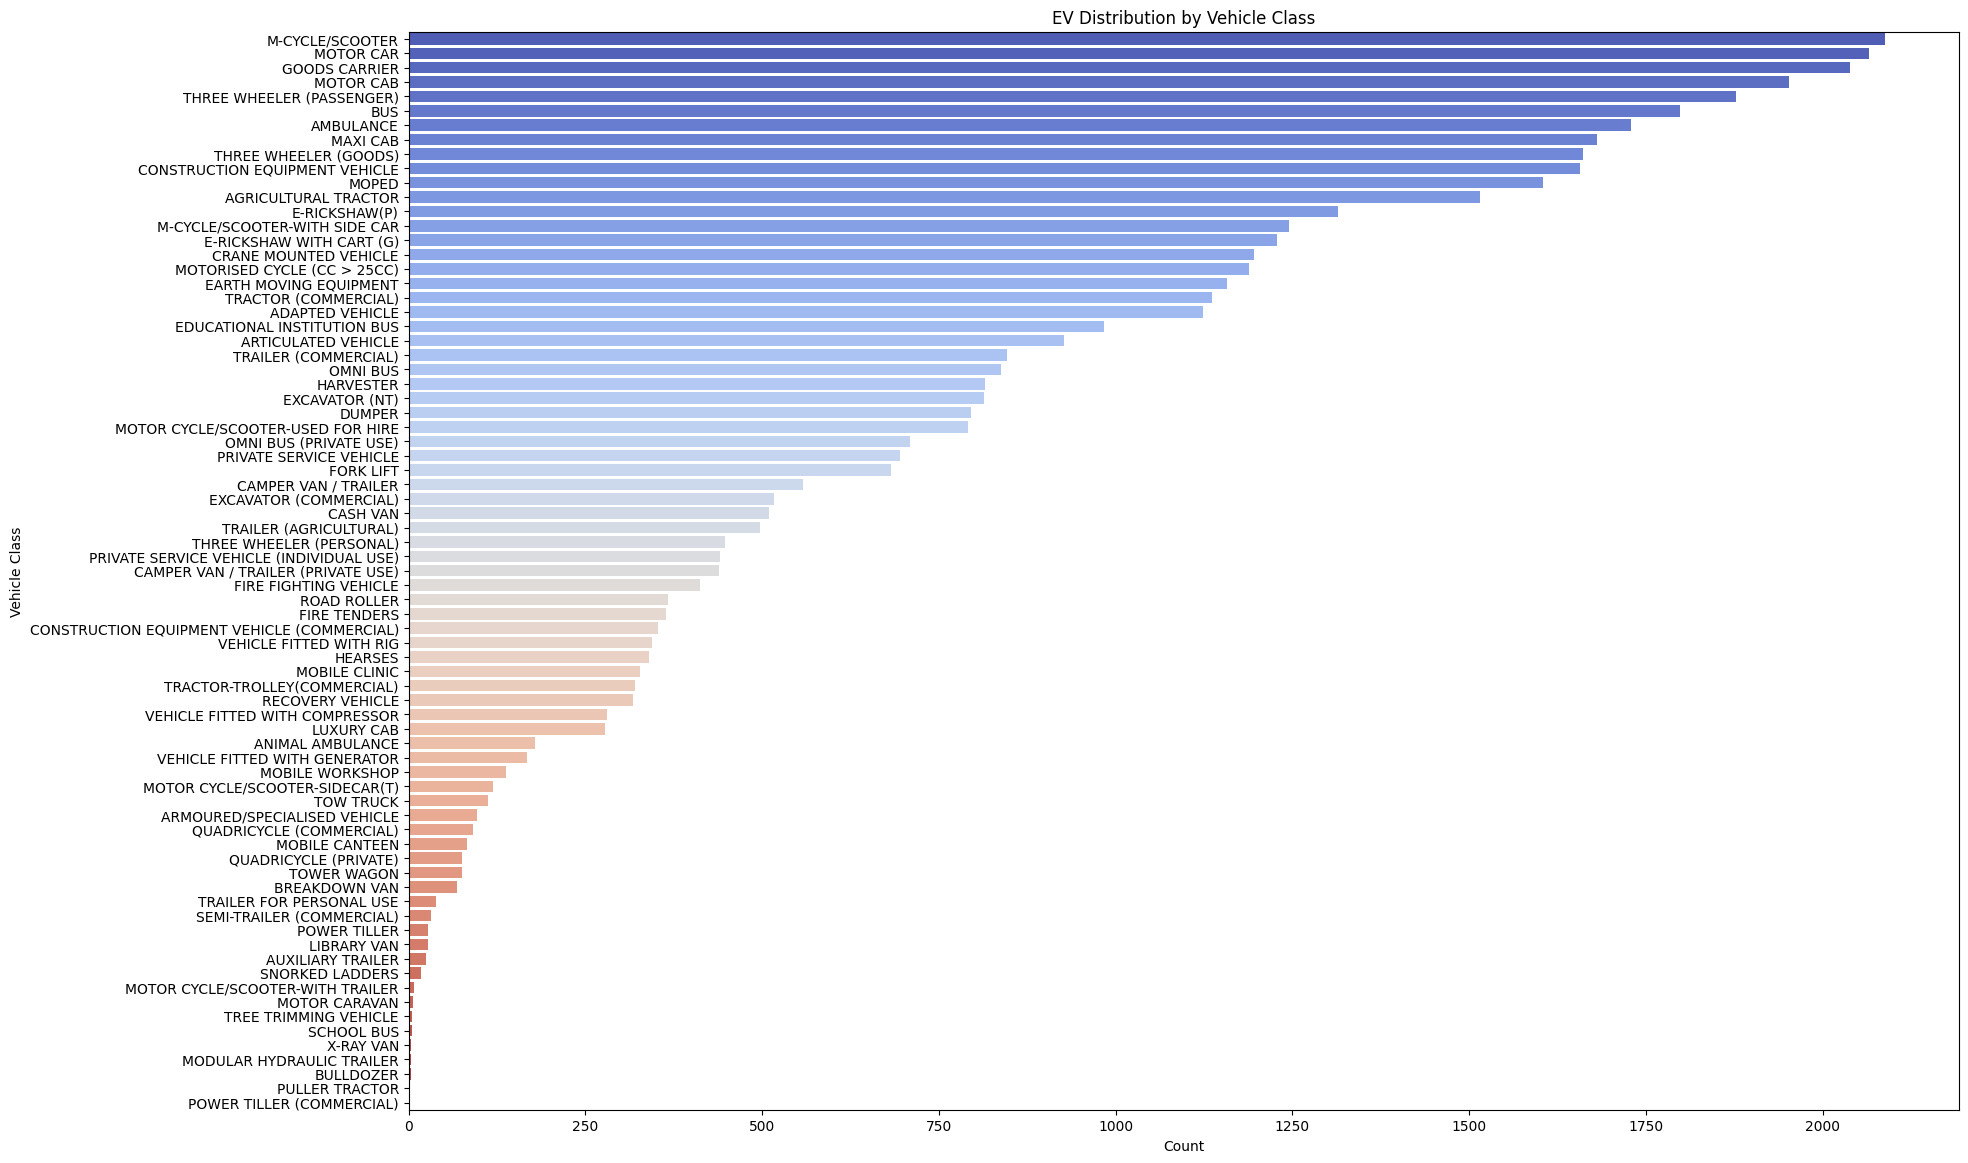

In [ ]:
# Vehicle Class Analysis
plt.figure(figsize=(20, 14))
sns.countplot(y=ev_data['Vehicle Class'], order=ev_data['Vehicle Class'].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Vehicle Class")
plt.title("EV Distribution by Vehicle Class")
plt.show()

<ipython-input-22-da1985935a9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ev_data['Vehicle Category'], order=ev_data['Vehicle Category'].value_counts().index, palette='magma')


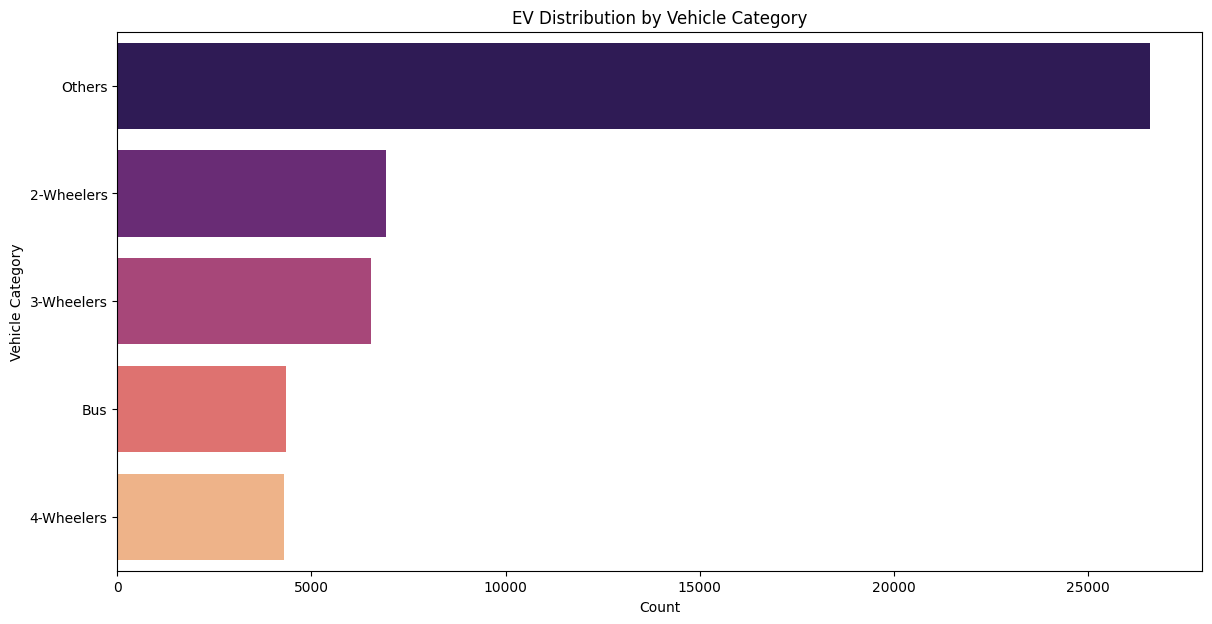

In [ ]:
# Vehicle Category Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y=ev_data['Vehicle Category'], order=ev_data['Vehicle Category'].value_counts().index, palette='magma')
plt.xlabel("Count")
plt.ylabel("Vehicle Category")
plt.title("EV Distribution by Vehicle Category")
plt.show()

<ipython-input-23-61167a02389e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ev_data['Vehicle Type'], order=ev_data['Vehicle Type'].value_counts().index, palette='viridis')


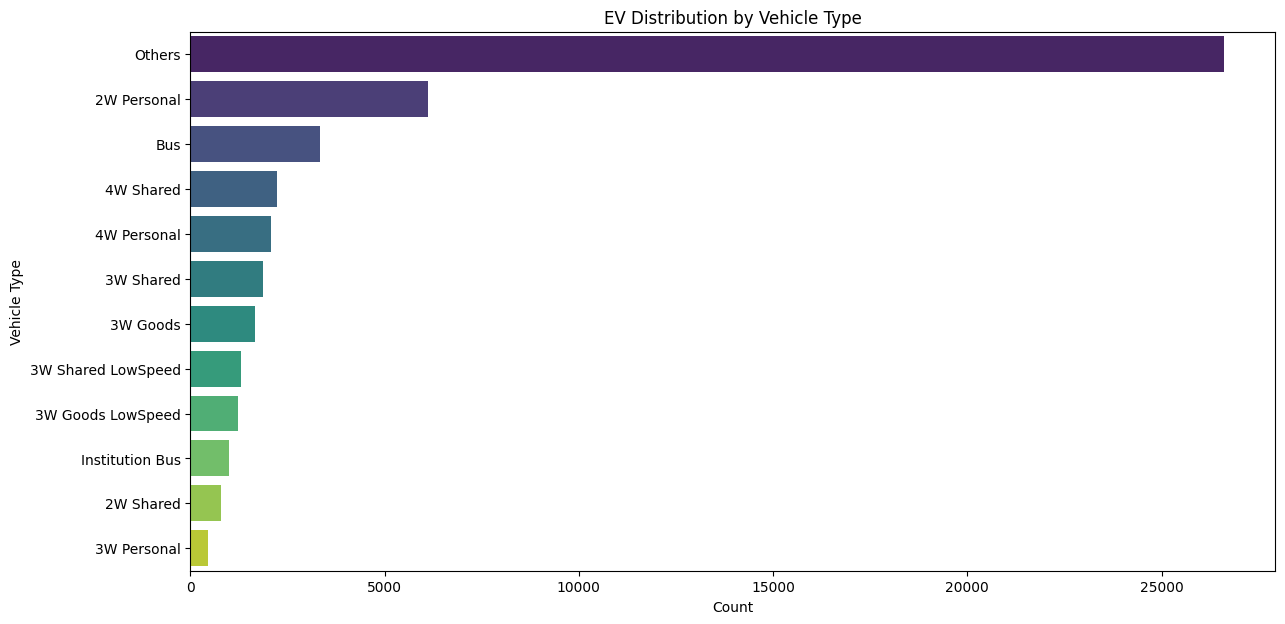

In [ ]:
# Vehicle Type Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y=ev_data['Vehicle Type'], order=ev_data['Vehicle Type'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Vehicle Type")
plt.title("EV Distribution by Vehicle Type")
plt.show()

<ipython-input-29-b387305fdf46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='EV Maker', data=ev_makers_grouped, palette='coolwarm')


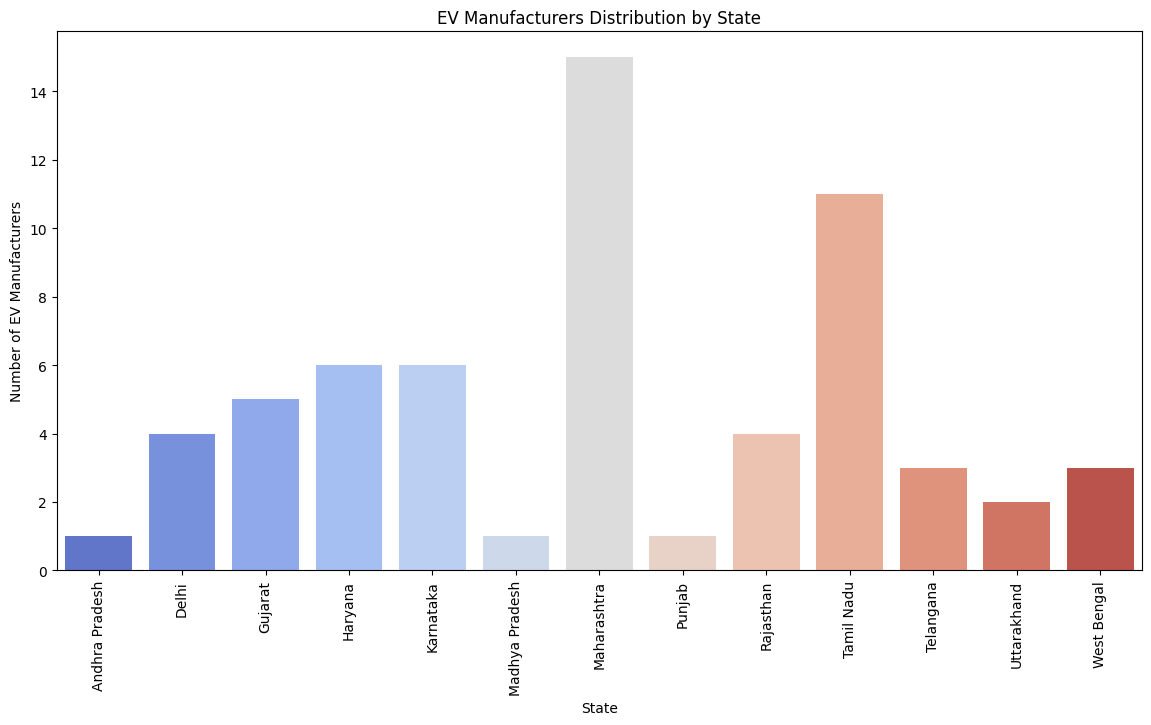

In [ ]:
# EV Maker Analysis by State
ev_makers_grouped = ev_makers_data.groupby('State')['EV Maker'].count().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='EV Maker', data=ev_makers_grouped, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of EV Manufacturers")
plt.title("EV Manufacturers Distribution by State")
plt.show()

<ipython-input-30-ebfac9ff8bc4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EV Maker', y='Count', data=ev_makers_companywise.head(15), palette='rocket')


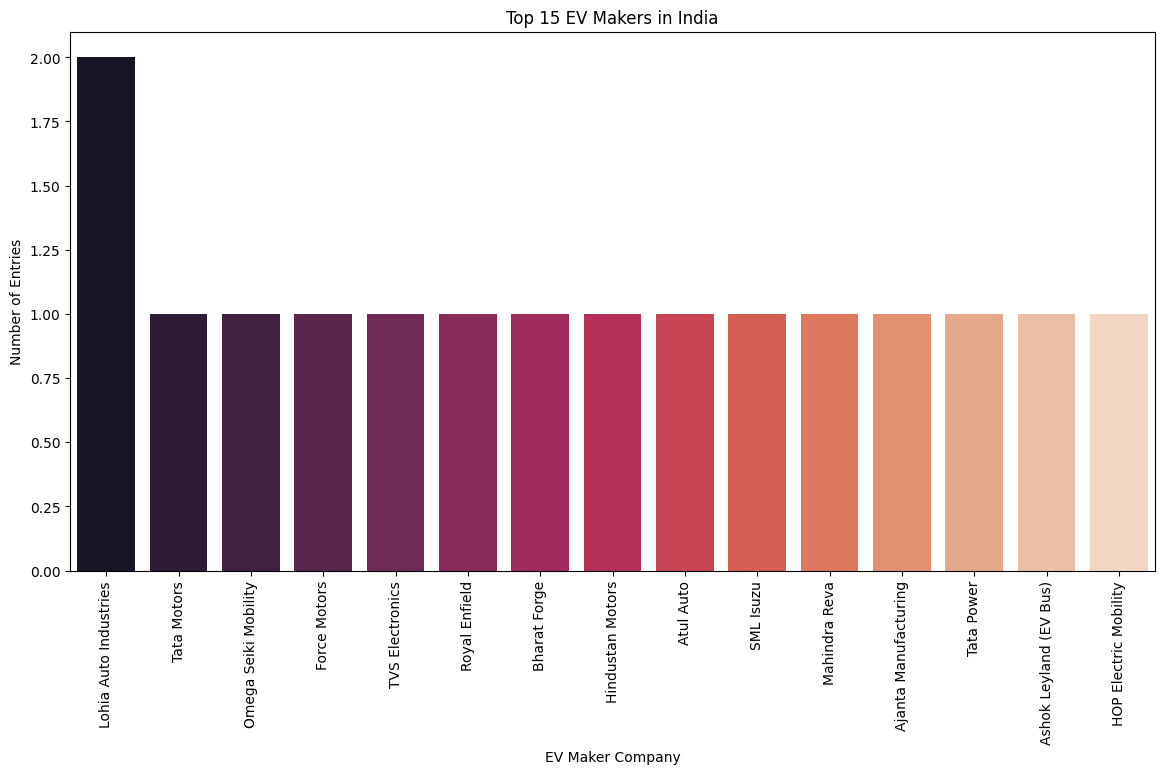

In [ ]:
# EV Maker Company-wise Analysis
ev_makers_companywise = ev_makers_data['EV Maker'].value_counts().reset_index()
ev_makers_companywise.columns = ['EV Maker', 'Count']
plt.figure(figsize=(14, 7))
sns.barplot(x='EV Maker', y='Count', data=ev_makers_companywise.head(15), palette='rocket')
plt.xticks(rotation=90)
plt.xlabel("EV Maker Company")
plt.ylabel("Number of Entries")
plt.title("Top 15 EV Makers in India")
plt.show()

In [ ]:
# Display clustered data
statewise_ev_data.sort_values(by='Cluster', inplace=True)
print(statewise_ev_data)

                       State  PURE EV  PLUG-IN HYBRID EV     Total  Cluster
0   Andaman & Nicobar Island     18.0                0.0     35622        0
31                   Tripura    366.0                0.0    269845        0
29                    Sikkim      0.0                0.0     50650        0
27                    Punjab  12251.0                0.0   2932658        0
26                Puducherry   1321.0                3.0    258748        0
24                  Nagaland      4.0                0.0    121594        0
23                   Mizoram     48.0                0.0    134809        0
22                 Meghalaya     18.0                0.0    167759        0
21                   Manipur     16.0                0.0    161191        0
18               Lakshadweep      0.0                0.0       799        0
33               Uttarakhand   4462.0                0.0   1150998        0
14                 Jharkhand   5041.0                0.0   2564058        0
13         J